In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

columnsHistoricalbars = ['close','high','low','trade','open','time','volume','volumeWeighted']

df = pd.read_json('../data/APPL.csv', convert_dates=['Time'])
df = pd.json_normalize(df['bars']['AAPL'])

df.columns = columnsHistoricalbars
df.head()

,close,high,low,trade,open,time,volume,volumeWeighted
0,105.35,105.368,102.00,351452,102.61,2016-01-04T05:00:00Z,71935339,104.091749
1,102.71,105.850,102.41,321365,105.75,2016-01-05T05:00:00Z,58690536,103.400868
2,100.70,102.370,99.87,409164,100.56,2016-01-06T05:00:00Z,71079827,100.843959
3,96.45,100.130,96.43,462836,98.68,2016-01-07T05:00:00Z,85996453,98.011371
4,96.96,99.110,96.76,419555,98.55,2016-01-08T05:00:00Z,75066292,97.897369


In [2]:
df.describe()

,close,high,low,trade,open,volume,volumeWeighted
count,2014.000000,2014.000000,2014.000000,2.014000e+03,2014.000000,2.014000e+03,2014.000000
mean,172.660234,174.322814,170.787124,4.243919e+05,172.468170,5.901802e+07,172.632221
std,62.411403,63.068126,61.494250,2.982206e+05,62.196201,3.946331e+07,62.349652
min,90.340000,91.670000,89.470000,3.000000e+00,90.000000,2.080515e+06,90.522026
25%,135.355000,136.847500,133.770925,1.801572e+05,135.550000,2.937100e+07,135.441215
50%,160.420000,162.350000,158.780050,3.489990e+05,160.297500,4.639027e+07,160.492228
75%,189.187500,190.140000,187.607500,5.958035e+05,189.140000,7.977318e+07,189.008347
max,506.090000,515.140000,500.330000,2.962331e+06,514.790000,3.570209e+08,505.387478


In [3]:
df.isnull().sum()

close             0
high              0
low               0
trade             0
open              0
time              0
volume            0
volumeWeighted    0
dtype: int64

In [4]:
df.loc[:, 'day'] = [pd.to_datetime(date.split('T')[0], format='%Y-%m-%d') for date in df.loc[:, 'time']]
df.loc[:, 'dateTime'] = pd.to_datetime(df.loc[:, 'time'], format='%Y-%m-%dT%H:%M:%SZ')
df['year'] = df['dateTime'].dt.year
df['month'] = df['dateTime'].dt.month
df['monthly'] = df['dateTime'].dt.strftime('%Y%m')

df = df.drop('time', axis=1)

display(df.info())
display(df['monthly'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   close           2014 non-null   float64       
 1   high            2014 non-null   float64       
 2   low             2014 non-null   float64       
 3   trade           2014 non-null   int64         
 4   open            2014 non-null   float64       
 5   volume          2014 non-null   int64         
 6   volumeWeighted  2014 non-null   float64       
 7   day             2014 non-null   datetime64[ns]
 8   dateTime        2014 non-null   datetime64[ns]
 9   year            2014 non-null   int32         
 10  month           2014 non-null   int32         
 11  monthly         2014 non-null   object        
dtypes: datetime64[ns](2), float64(5), int32(2), int64(2), object(1)
memory usage: 173.2+ KB


None

0       201601
1       201601
2       201601
3       201601
4       201601
         ...  
2009    202312
2010    202312
2011    202312
2012    202401
2013    202401
Name: monthly, Length: 2014, dtype: object

In [5]:
unique_years = df['year'].unique()
palette = sns.color_palette("husl", len(unique_years))

unique_monthly = df['monthly'].unique()
palette_monthly = sns.color_palette("husl", len(unique_monthly))

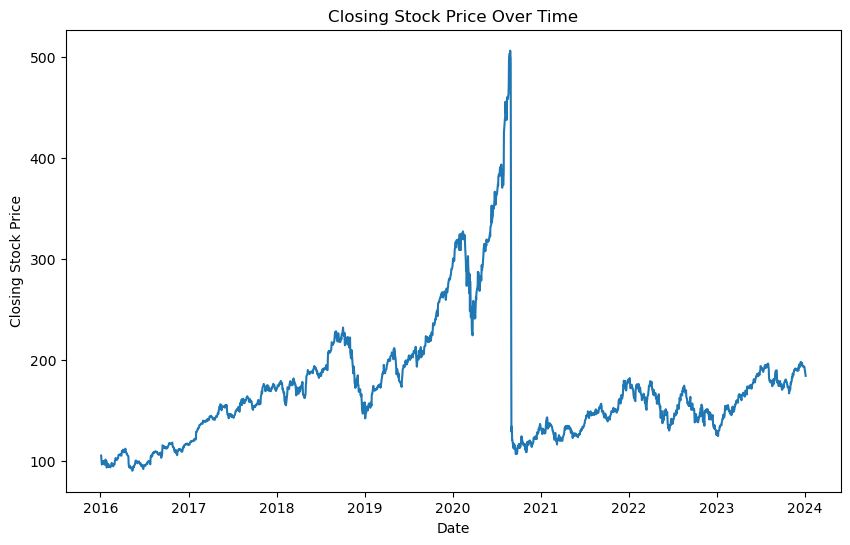

In [6]:
#Line chart of closing stock price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='close', data=df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

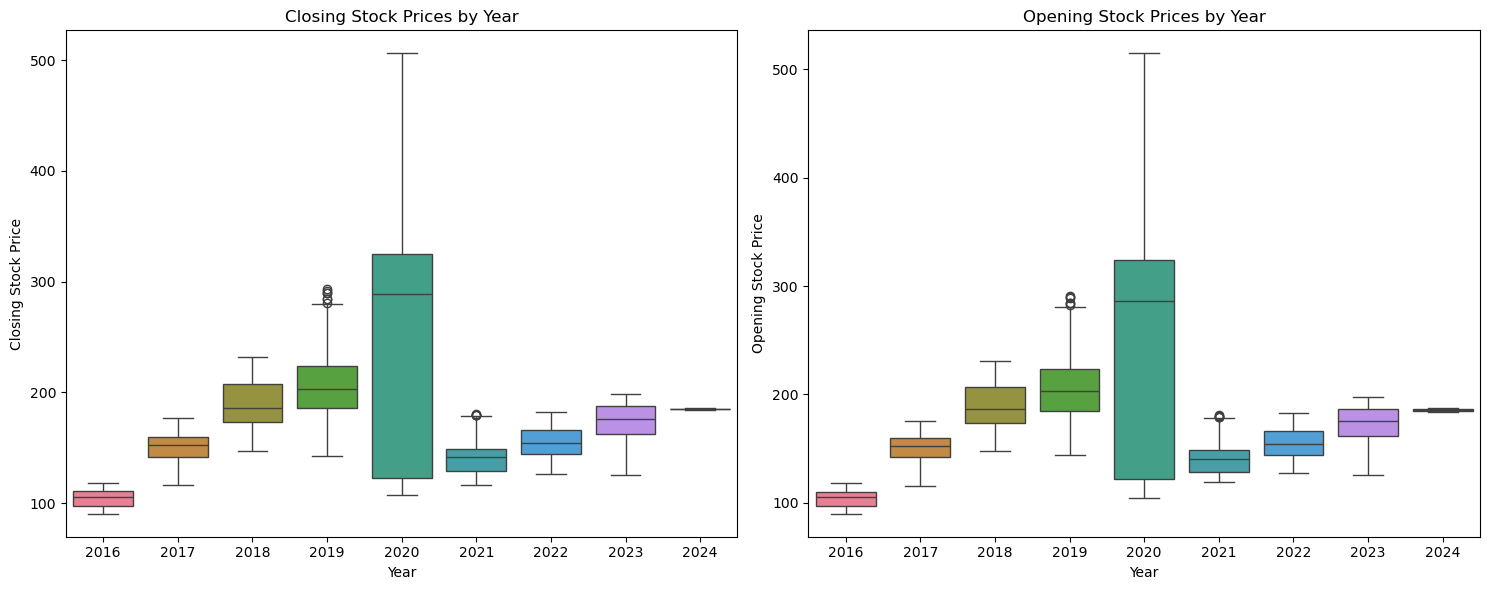

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Closing Prices (left side)
sns.boxplot(x='year', y='close', data=df, ax=axes[0], hue='year', palette=palette)
axes[0].set_title('Closing Stock Prices by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Closing Stock Price')
axes[0].get_legend().remove()

# Opening Prices (right side)
sns.boxplot(x='year', y='open', data=df, ax=axes[1], hue='year', palette=palette)
axes[1].set_title('Opening Stock Prices by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Opening Stock Price')
axes[1].get_legend().remove()

plt.tight_layout()
plt.show()

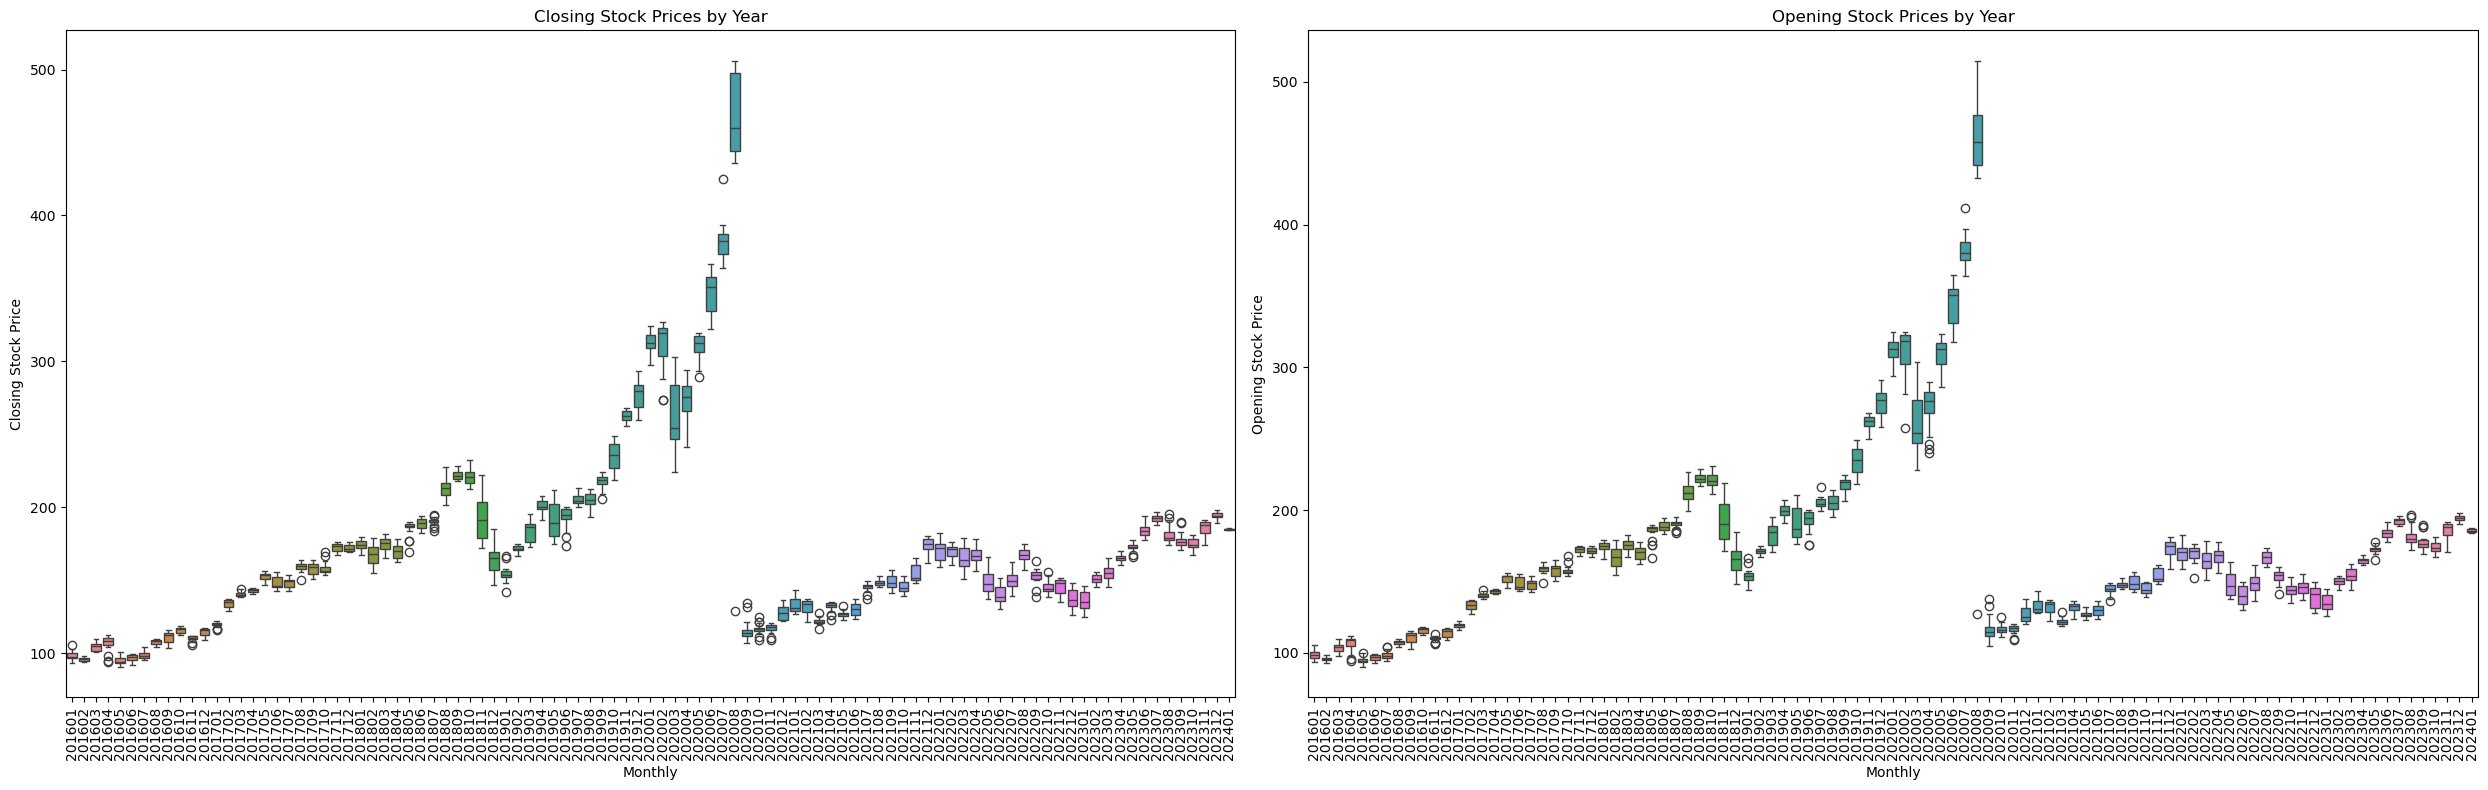

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))

# Closing Prices (left side)
sns.boxplot(x='monthly', y='close', data=df, ax=axes[0], hue='monthly', palette=palette_monthly)
axes[0].set_title('Closing Stock Prices by Year')
axes[0].set_xlabel('Monthly')
axes[0].set_ylabel('Closing Stock Price')
axes[0].tick_params(axis='x', rotation=90)
#axes[0].get_legend().remove()

# Opening Prices (right side)
sns.boxplot(x='monthly', y='open', data=df, ax=axes[1], hue='monthly', palette=palette_monthly)
axes[1].set_title('Opening Stock Prices by Year')
axes[1].set_xlabel('Monthly')
axes[1].set_ylabel('Opening Stock Price')
axes[1].tick_params(axis='x', rotation=90)
#axes[1].get_legend().remove()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

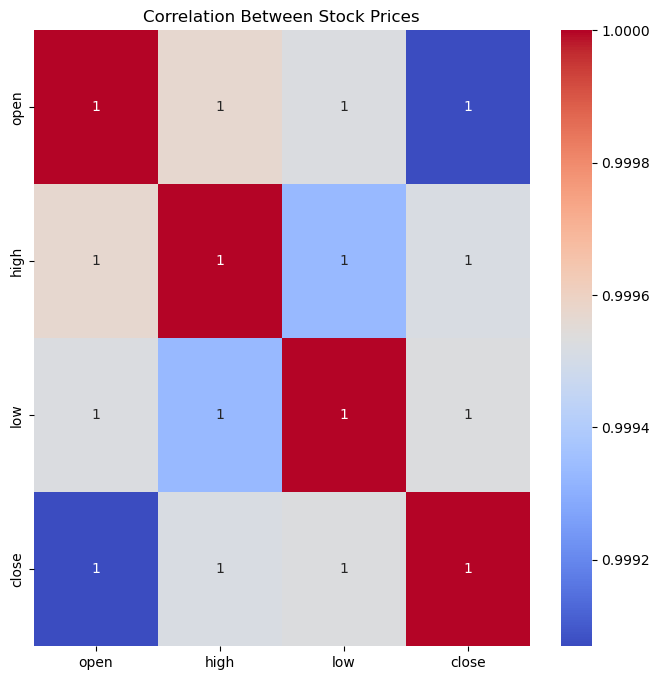

In [9]:
corr = df[['open', 'high', 'low', 'close']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

In [10]:
#DATA TRANSFORMATION
from sklearn.preprocessing import StandardScaler

dfStandarized = df.copy()
q1 = df['close'].quantile(0.25)
q3 = df['close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
dfStandarized = dfStandarized[dfStandarized['close'] <= upper_bound]

#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfStandarized[['open', 'high', 'low', 'close']] = scaler.fit_transform(dfStandarized[['open', 'high', 'low', 'close']])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_182496\3685166075.py:4: UserWarning: The palette list has more values (97) than needed (92), which may not be intended.
  sns.boxplot(x='monthly', y='open', data=dfStandarized, ax=axes[0], hue='monthly', palette=palette_monthly)


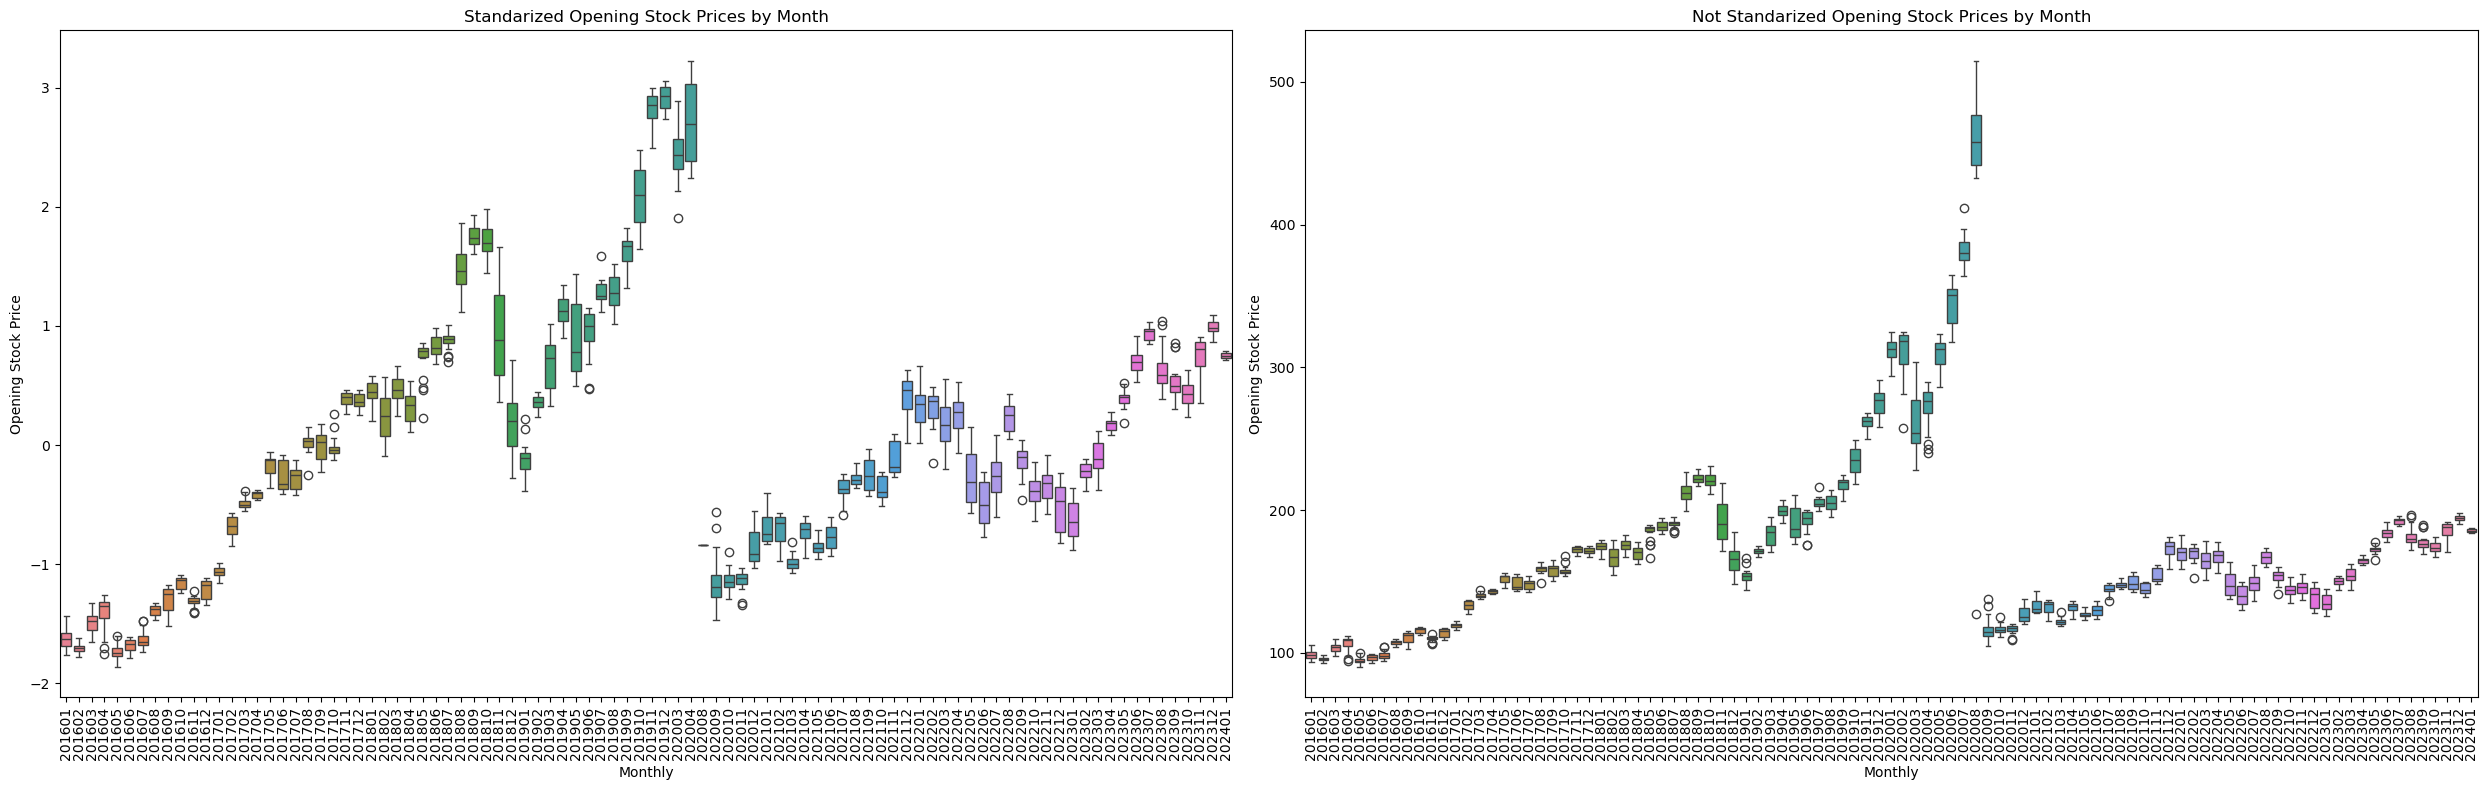

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))

# Closing Prices (left side)
sns.boxplot(x='monthly', y='open', data=dfStandarized, ax=axes[0], hue='monthly', palette=palette_monthly)
axes[0].set_title('Standarized Opening Stock Prices by Month')
axes[0].set_xlabel('Monthly')
axes[0].set_ylabel('Opening Stock Price')
axes[0].tick_params(axis='x', rotation=90)
#axes[0].get_legend().remove()

# Opening Prices (right side)
sns.boxplot(x='monthly', y='open', data=df, ax=axes[1], hue='monthly', palette=palette_monthly)
axes[1].set_title('Not Standarized Opening Stock Prices by Month')
axes[1].set_xlabel('Monthly')
axes[1].set_ylabel('Opening Stock Price')
axes[1].tick_params(axis='x', rotation=90)
#axes[1].get_legend().remove()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

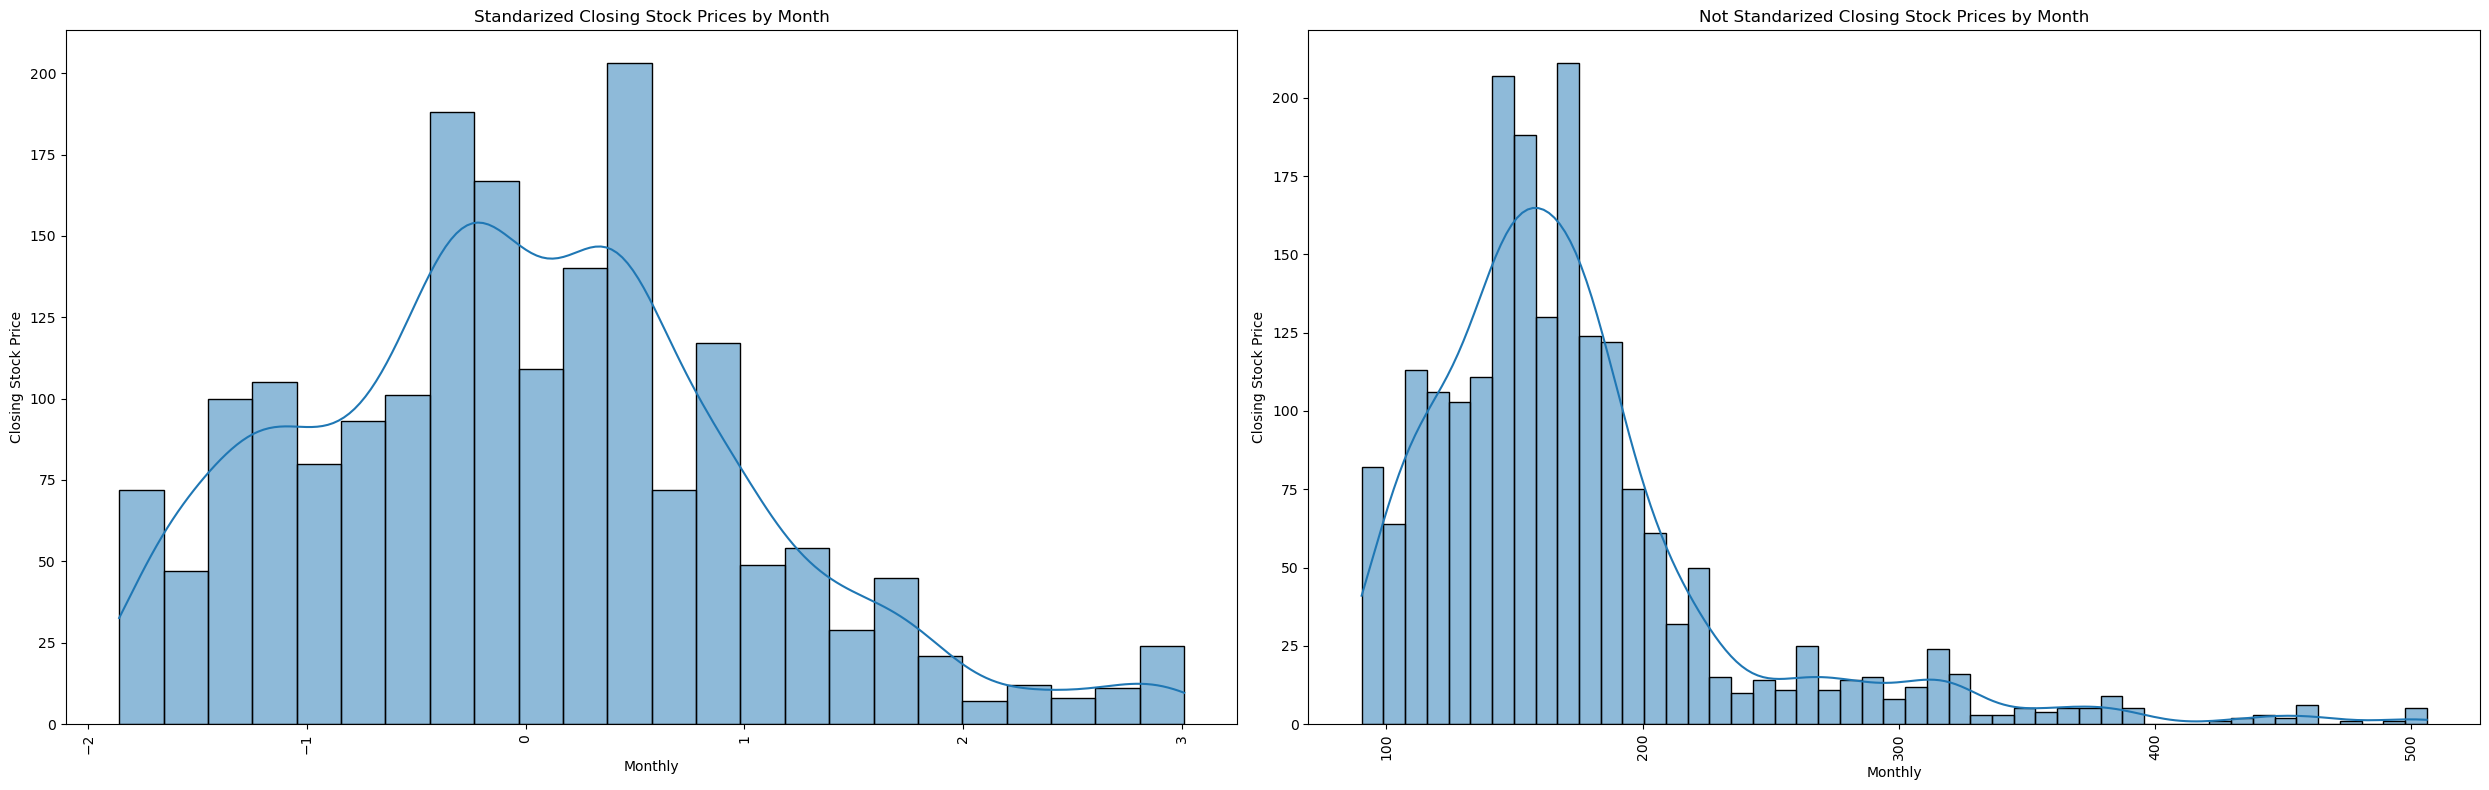

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))

# Standarized Prices (left side)
sns.histplot(dfStandarized['close'], kde=True, ax=axes[0])
# sns.boxplot(data=dfStandarized, ax=axes[0])
axes[0].set_title('Standarized Closing Stock Prices by Month')
axes[0].set_xlabel('Monthly')
axes[0].set_ylabel('Closing Stock Price')
axes[0].tick_params(axis='x', rotation=90)
#axes[0].get_legend().remove()

# Not Standarized Prices (right side)
sns.histplot(df['close'], kde=True, ax=axes[1])
axes[1].set_title('Not Standarized Closing Stock Prices by Month')
axes[1].set_xlabel('Monthly')
axes[1].set_ylabel('Closing Stock Price')
axes[1].tick_params(axis='x', rotation=90)
#axes[1].get_legend().remove()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

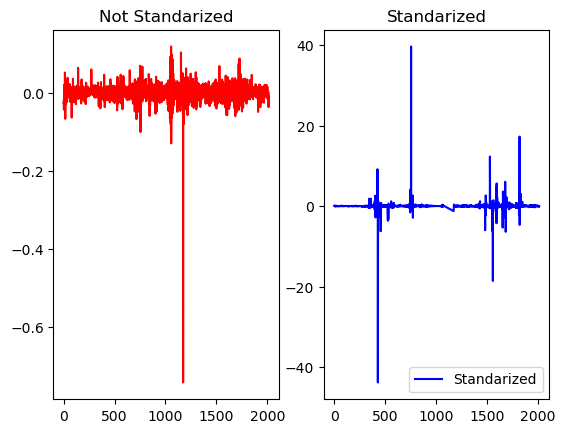

In [13]:
# Possible returns
daily_returns = df['close'].pct_change()
daily_returns_dfStandarized = dfStandarized['close'].pct_change()

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2)

# For Sine Function
axis[0].plot(daily_returns.index, daily_returns.values, color='r', label='Not Standarized ')
axis[0].set_title("Not Standarized")

# For Cosine Function
axis[1].plot(daily_returns_dfStandarized.index, daily_returns_dfStandarized.values, color='b', label='Standarized')
axis[1].set_title("Standarized")

# plt.figure(figsize=[15,6])
plt.legend()
plt.show()

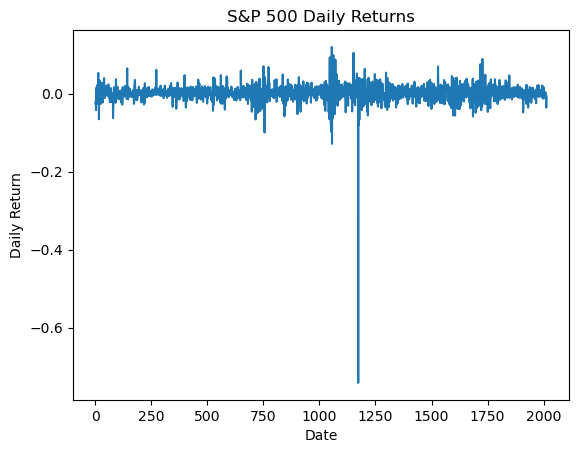

In [14]:
# Possible returns
# pct_changes = calculates the percentage change in the values through a series

# Create a line chart of the daily returns
plt.plot(daily_returns.index, daily_returns.values)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

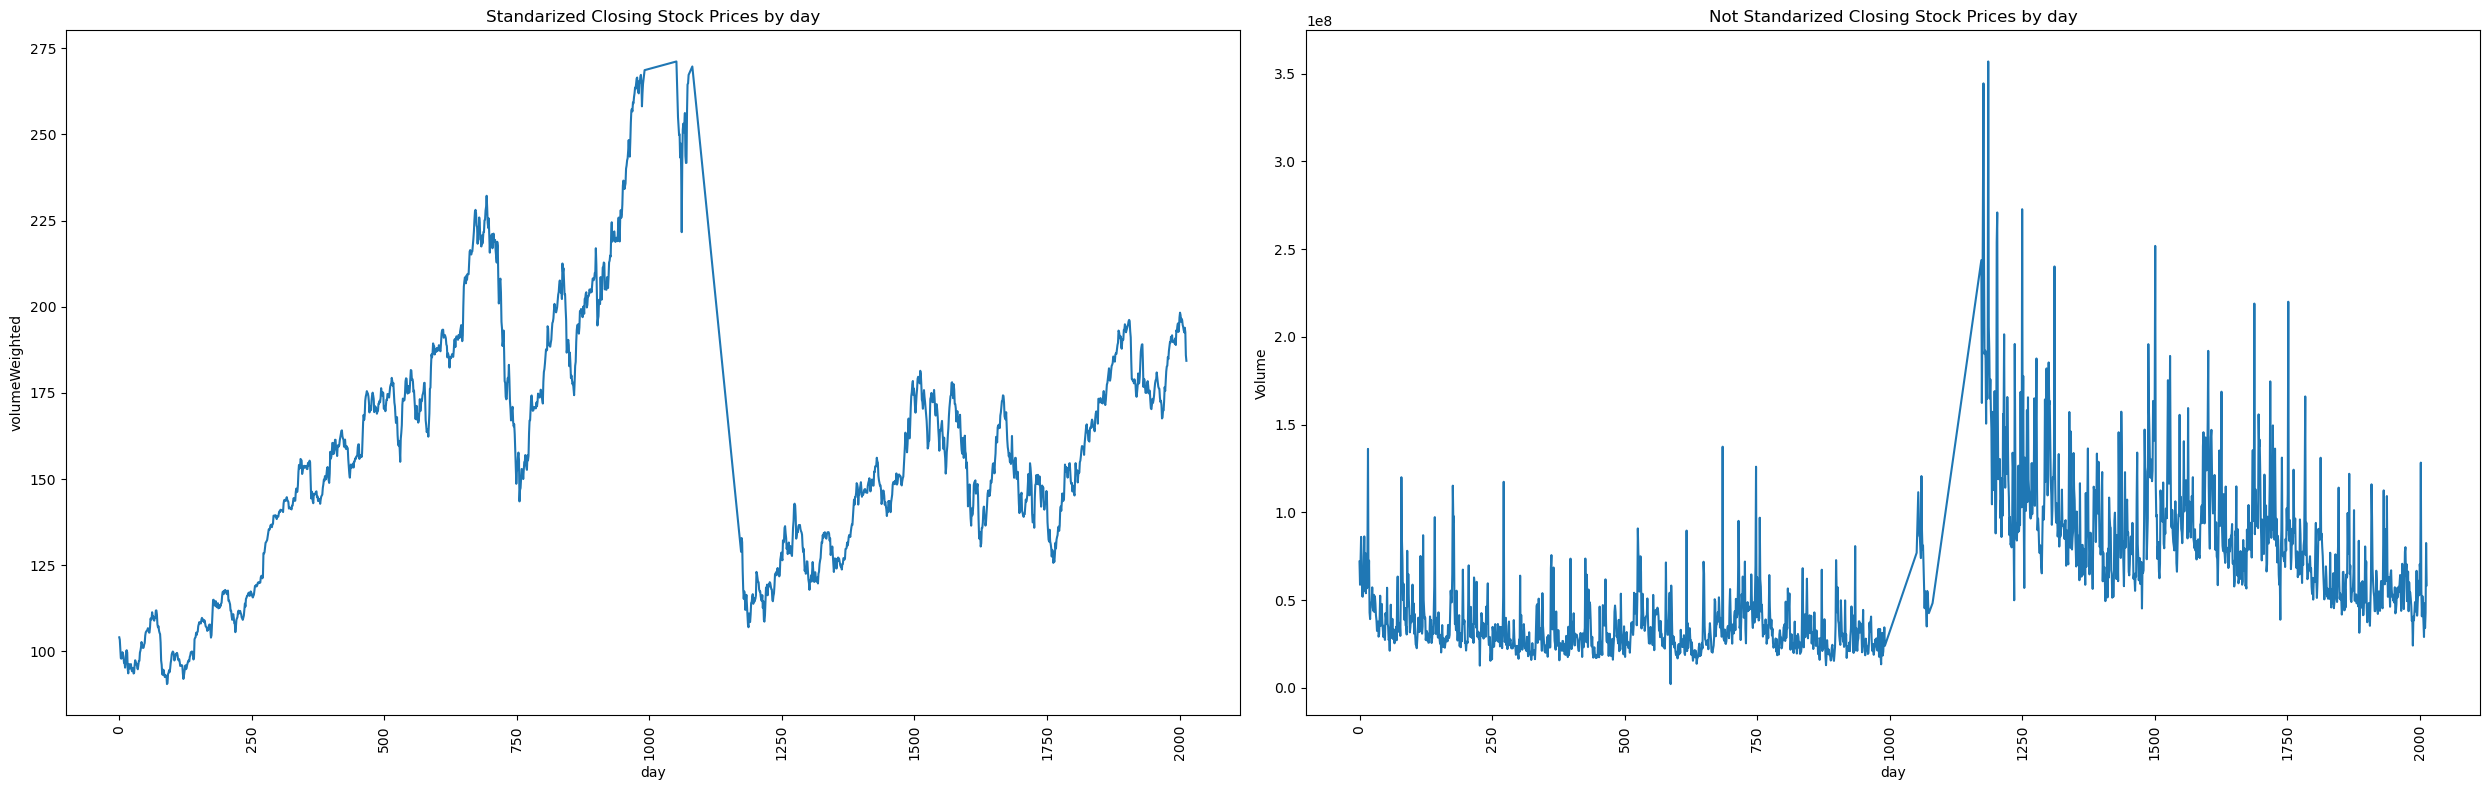

In [22]:
# fig, ax = plt.figure(figsize=(12,6))

# sns.lineplot(x='day', y='close', data=df, color='b')
# sns.lineplot(x='day', y='volume', data=df, color='g', alpha=0.5)
# plt.title('S&P 500 Stock Prices with Volume Traded')
# plt.xlabel('Year')
# plt.ylabel('Price/Volume')
# plt.legend(['Closing Price', 'Volume'])
# plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))

# Standarized Prices (left side)
sns.lineplot(dfStandarized['volumeWeighted'],   ax=axes[0])
# sns.boxplot(data=dfStandarized, ax=axes[0])
axes[0].set_title('Standarized Closing Stock Prices by day')
axes[0].set_xlabel('day')
axes[0].set_ylabel('volumeWeighted')
axes[0].tick_params(axis='x', rotation=90)
#axes[0].get_legend().remove()

# Not Standarized Prices (right side)
sns.ba(dfStandarized['volume'],   ax=axes[1])
axes[1].set_title('Not Standarized Closing Stock Prices by day')
axes[1].set_xlabel('day')
axes[1].set_ylabel('Volume')
axes[1].tick_params(axis='x', rotation=90)
#axes[1].get_legend().remove()

plt.tight_layout()
plt.show()

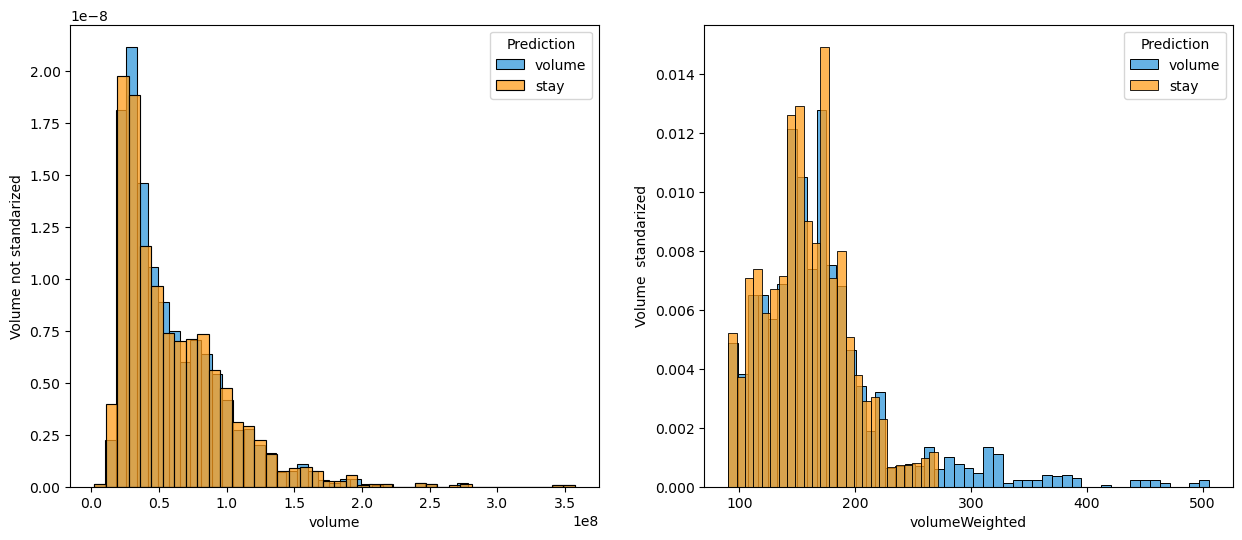

In [30]:
#select columns
cols = ['volume','volumeWeighted']
fig, axs = plt.subplots(ncols=len(cols), figsize=((15,6)), sharey=False)

for i, col in enumerate(cols):
    sns.histplot(df.loc[:,col],
                 stat="density", # use relative frequncies
                 kde=False,      # mute kde-plot
                 label='volume',  # set label for legend
                 ax=axs[i],      # use subplot
                 color="#3399db")
    sns.histplot(dfStandarized.loc[:,col], 
                 stat="density",
                 kde=False,
                 label='stay',
                 ax=axs[i],
                 color="#ff9e1c")
    axs[i].set(ylabel='Volume {} standarized'.format('not' if i == 0 else ''))
    "My name is {}, I'm {}".format("John",36)
    axs[i].legend(title="Prediction") #title for legend

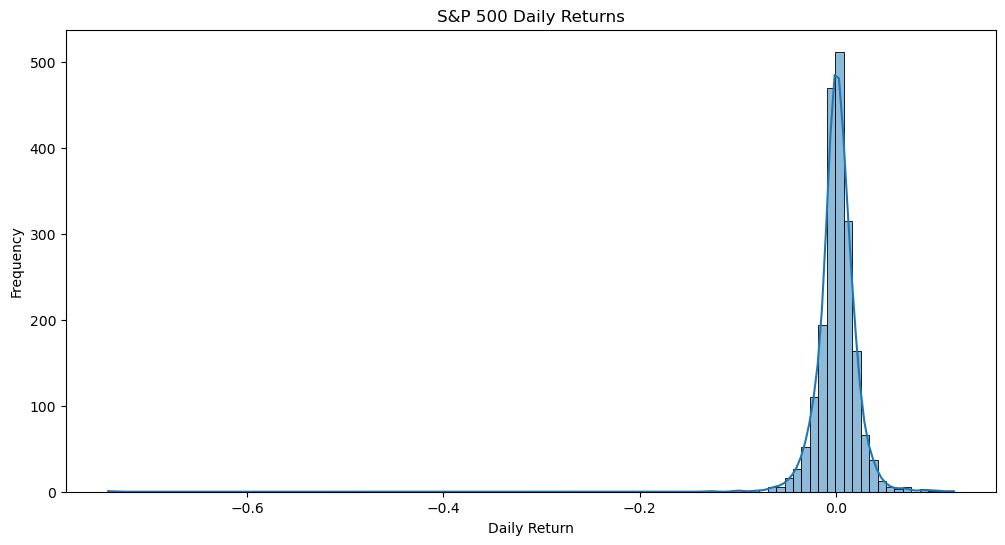